In [1]:
from peratouch.data import Data, load_data
from peratouch.trainer import Trainer 
from peratouch.results import Results 
from peratouch.networks import CNN
from peratouch.config import path_five_users_main, path_five_users_first
import sklearn

def run_dataset(X, y):
    """
    Runs entire routine of fitting CNN model to dataset (X, y)self.
    Performs Cross-Validation of n_folds.
    Assumes data is already shuffled.
    """

    D = Data(X, y)

    # Create indices of several folds
    n_folds = 5               # Run 5 folds for each dataset
    D.make_folds(n_folds)     # Makes indices available inside class

    predictions = []
    actual_vals = []

    for _ in range(n_folds):     # Run all folds 
        D.next_fold()
        D.normalize()
        D.tensors_to_device()
        D.print_shapes()
        # D.plot_data()
        model = CNN(n_ch=1)      # Initialize new model each fold
        T = Trainer(D)
        T.setup(model, max_epochs=20, batch_size=int(len(D.xtr)/20))       # 20 minibatches
        T.train_model(model)
        # T.plot_train()
        R = Results(D, model)
        R.test_metrics()
        preds, actual = R.get_preds_actual()

        predictions.extend(preds)
        actual_vals.extend(actual)

    print(sklearn.metrics.classification_report(actual_vals, predictions))
    return actual_vals, predictions



--- Testing new dataset size ---



-- New splitting of dataset --



-- New Fold --
Train, test and validation arrays normalized to:
[1.], [0.9987], [0.9982]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (53213, 1, 32) 
Labels shape:  (53213,) 
Shape of test set: (10643, 1, 32) 
Shape of train set: (36184, 1, 32) 
Shape of validation set: (6386, 1, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.23, 0.18, 0.22, 0.2, 0.17] 
Fraction of validation labels:  [0.22, 0.19, 0.21, 0.21, 0.17] 
Fraction of train labels:  [0.22, 0.19, 0.21, 0.21, 0.17] 
dtype of inputs:  torch.float32

 Start of training model:

End of epoch 1: loss_tr=1.124, loss_val=1.130, train=57.4%, val=57.1%
End of epoch 3: loss_tr=0.996, loss_val=1.003, train=60.2%, val=60.0%
End of epoch 5: loss_tr=0.996, loss_val=1.002, train=61.1%, val=61.1%
End of epoch 7: loss_tr=0.914, loss_val=0.920, train=64.3%, val=63.9%
End of epoch 9: loss_tr=0.895, loss_val=0.902, train=65.1%, val=64.5%
End of 

End of epoch 1: loss_tr=1.007, loss_val=1.037, train=61.2%, val=59.8%
End of epoch 3: loss_tr=0.926, loss_val=0.950, train=63.9%, val=63.0%
End of epoch 5: loss_tr=0.918, loss_val=0.934, train=64.4%, val=64.4%
End of epoch 7: loss_tr=0.896, loss_val=0.922, train=65.4%, val=64.6%
End of epoch 9: loss_tr=0.930, loss_val=0.957, train=63.6%, val=63.0%
End of epoch 11: loss_tr=0.915, loss_val=0.947, train=63.5%, val=62.5%
End of epoch 13: loss_tr=0.840, loss_val=0.867, train=67.7%, val=66.9%
End of epoch 15: loss_tr=0.870, loss_val=0.892, train=66.5%, val=65.1%
End of epoch 17: loss_tr=0.858, loss_val=0.874, train=66.8%, val=66.1%
End of epoch 19: loss_tr=0.855, loss_val=0.874, train=67.1%, val=66.5%

Training Complete!
Loading best weights for lowest validation loss=0.867 ...

Average running time per epoch: 0.58 seconds
Total running time: 10.95 seconds


-- New Fold --
Train, test and validation arrays normalized to:
[1.], [0.9998], [1.0015]
Using Device:  cpu , dtype:  torch.float32

Ra

End of epoch 15: loss_tr=0.919, loss_val=0.948, train=63.4%, val=62.0%
End of epoch 17: loss_tr=0.894, loss_val=0.913, train=64.4%, val=64.0%
End of epoch 19: loss_tr=0.861, loss_val=0.882, train=65.7%, val=65.1%

Training Complete!
Loading best weights for lowest validation loss=0.862 ...

Average running time per epoch: 0.39 seconds
Total running time: 7.48 seconds


-- New Fold --
Train, test and validation arrays normalized to:
[1.], [0.9987], [1.0009]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (35475, 1, 32) 
Labels shape:  (35475,) 
Shape of test set: (7095, 1, 32) 
Shape of train set: (24123, 1, 32) 
Shape of validation set: (4257, 1, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.22, 0.19, 0.21, 0.21, 0.17] 
Fraction of validation labels:  [0.23, 0.19, 0.2, 0.21, 0.16] 
Fraction of train labels:  [0.22, 0.19, 0.21, 0.21, 0.17] 
dtype of inputs:  torch.float32

 Start of training model:

End of epoch 1: loss_tr=1.057, loss_val=1.061, train=58.6%

End of epoch 1: loss_tr=1.016, loss_val=1.003, train=59.5%, val=60.3%
End of epoch 3: loss_tr=0.942, loss_val=0.934, train=64.1%, val=65.0%
End of epoch 5: loss_tr=0.898, loss_val=0.894, train=64.8%, val=65.8%
End of epoch 7: loss_tr=0.899, loss_val=0.892, train=65.4%, val=66.0%
End of epoch 9: loss_tr=0.881, loss_val=0.868, train=65.8%, val=66.3%
End of epoch 11: loss_tr=0.889, loss_val=0.876, train=64.7%, val=65.3%
End of epoch 13: loss_tr=0.867, loss_val=0.853, train=66.5%, val=67.3%
End of epoch 15: loss_tr=0.875, loss_val=0.882, train=66.1%, val=66.2%
End of epoch 17: loss_tr=0.830, loss_val=0.825, train=67.5%, val=67.7%
End of epoch 19: loss_tr=1.015, loss_val=1.027, train=61.1%, val=60.7%

Training Complete!
Loading best weights for lowest validation loss=0.812 ...

Average running time per epoch: 0.39 seconds
Total running time: 7.50 seconds


-- New Fold --
Train, test and validation arrays normalized to:
[1.], [1.0045], [1.0024]
Using Device:  cpu , dtype:  torch.float32

Raw

/home/guijmp/dev/Masters_Project/peratouch/peratouch/trainer.py:140: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()



Raw data shape:  (35475, 1, 32) 
Labels shape:  (35475,) 
Shape of test set: (7095, 1, 32) 
Shape of train set: (24123, 1, 32) 
Shape of validation set: (4257, 1, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.23, 0.17, 0.21, 0.22, 0.17] 
Fraction of validation labels:  [0.23, 0.18, 0.21, 0.21, 0.16] 
Fraction of train labels:  [0.23, 0.18, 0.21, 0.21, 0.17] 
dtype of inputs:  torch.float32

 Start of training model:

End of epoch 1: loss_tr=1.077, loss_val=1.100, train=58.5%, val=57.6%
End of epoch 3: loss_tr=0.952, loss_val=0.983, train=62.8%, val=62.4%
End of epoch 5: loss_tr=0.936, loss_val=0.950, train=63.4%, val=62.9%
End of epoch 7: loss_tr=0.901, loss_val=0.929, train=64.8%, val=63.8%
End of epoch 9: loss_tr=0.947, loss_val=0.981, train=63.5%, val=62.5%
End of epoch 11: loss_tr=0.934, loss_val=0.949, train=62.7%, val=62.2%
End of epoch 13: loss_tr=0.888, loss_val=0.914, train=65.8%, val=64.9%
End of epoch 15: loss_tr=0.889, loss_val=0.912, train=65.8%, val=64.8

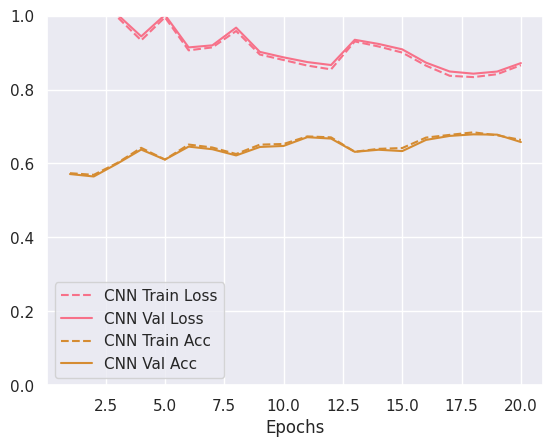

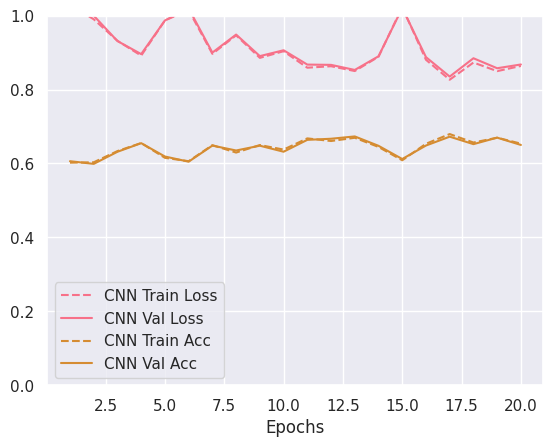

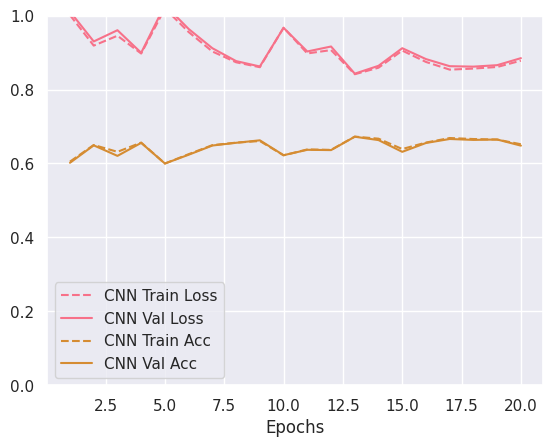

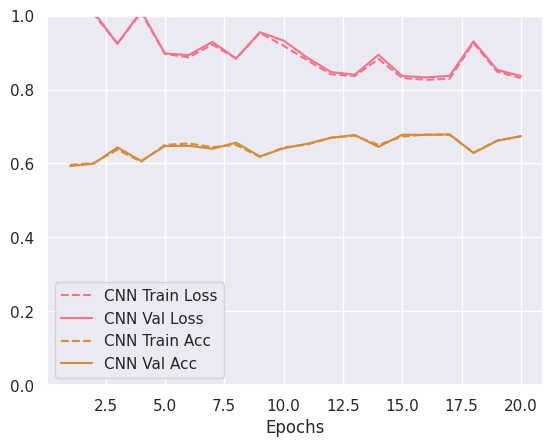

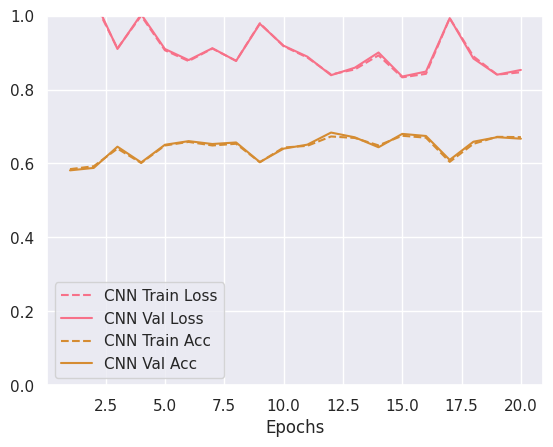

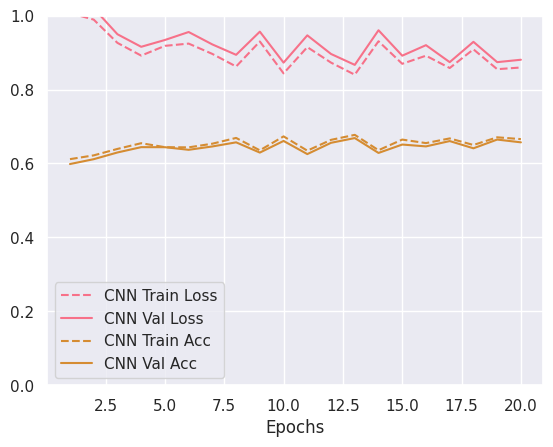

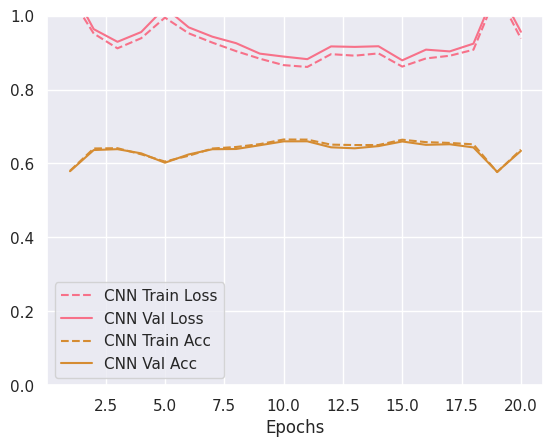

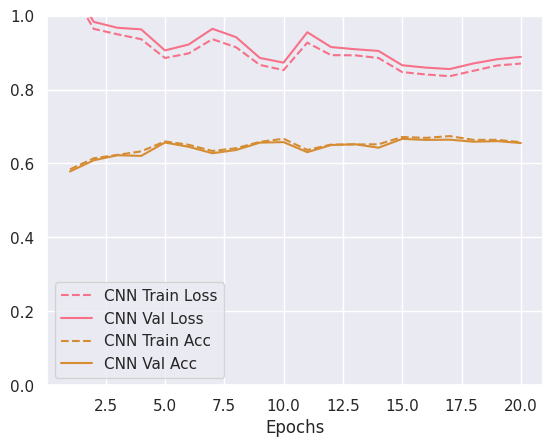

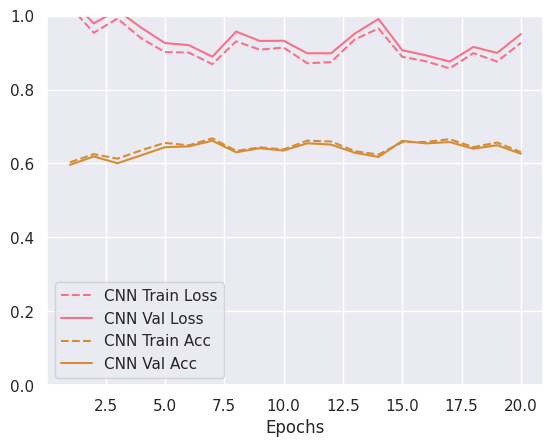

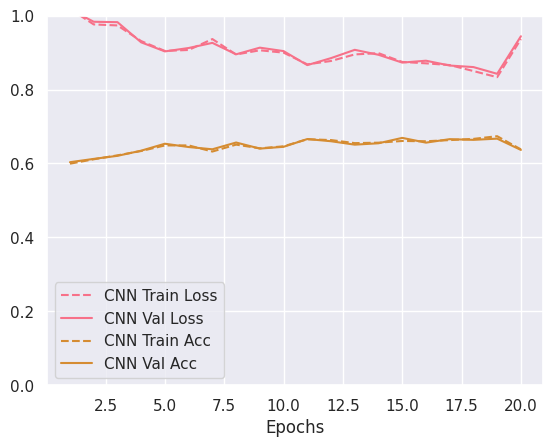

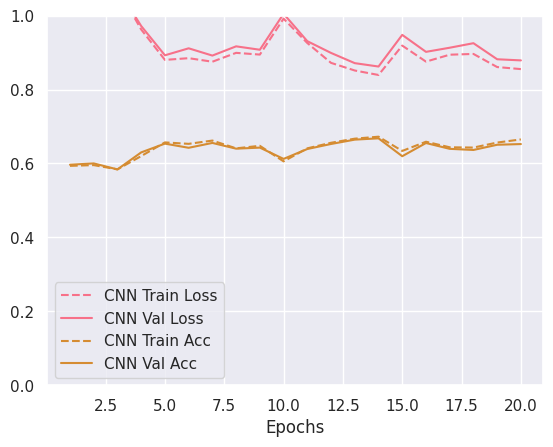

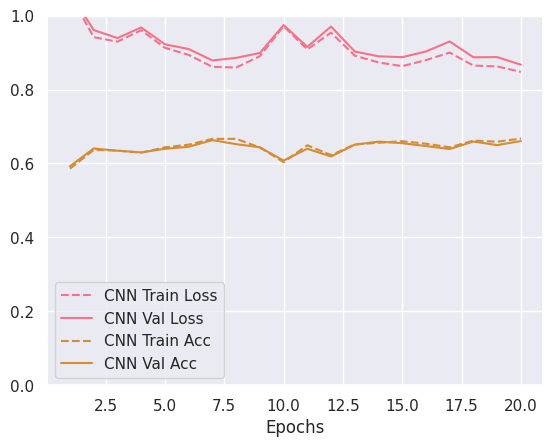

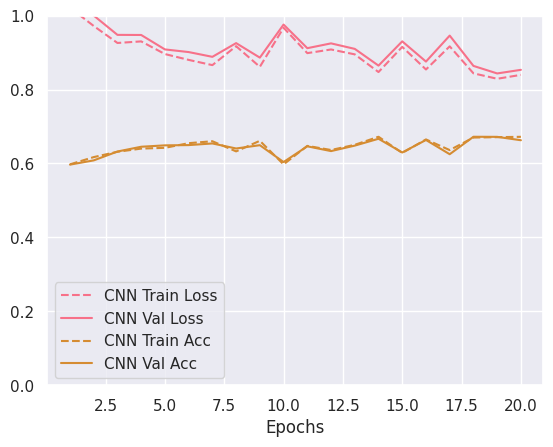

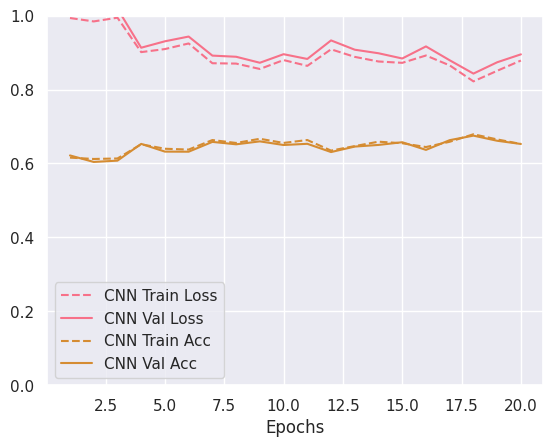

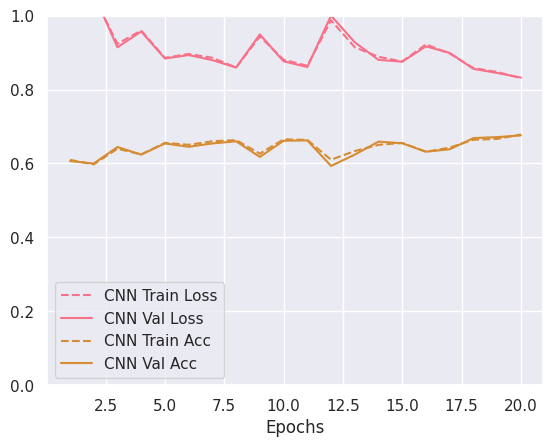

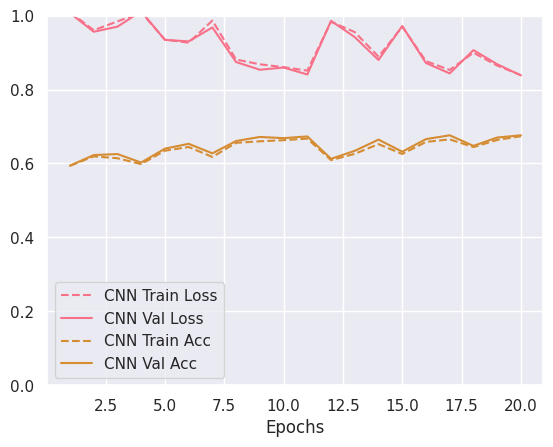

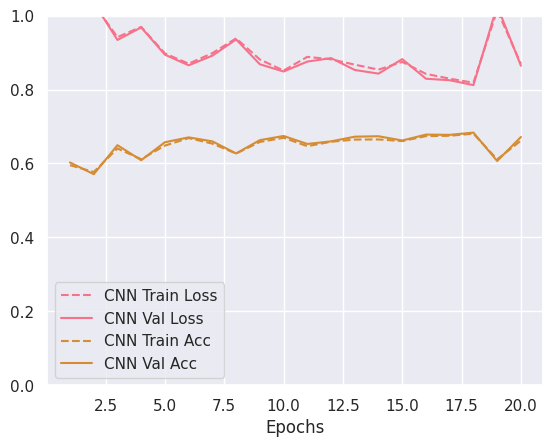

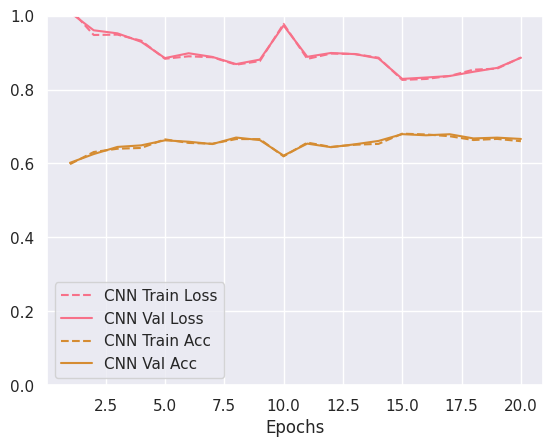

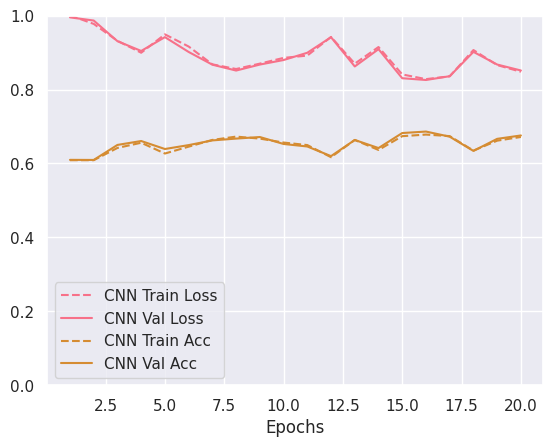

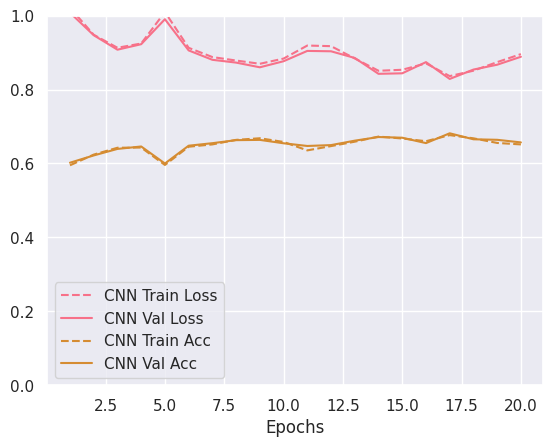

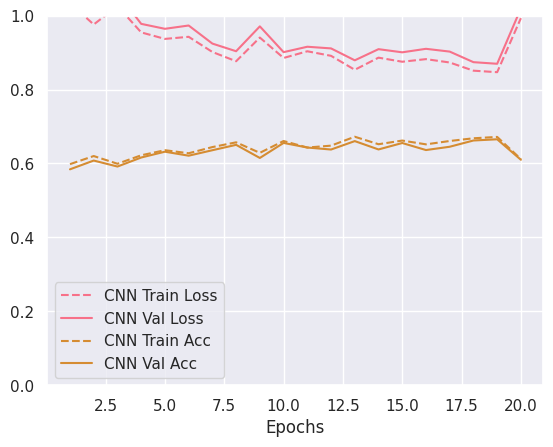

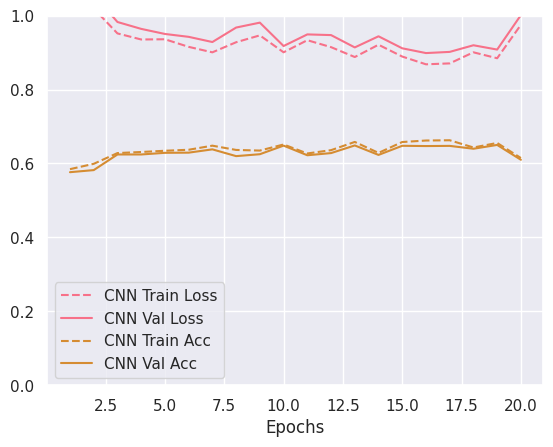

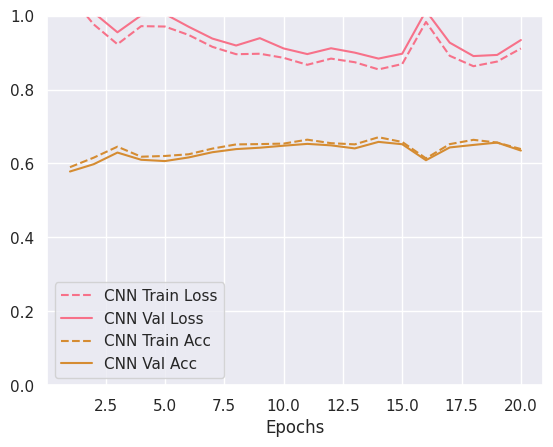

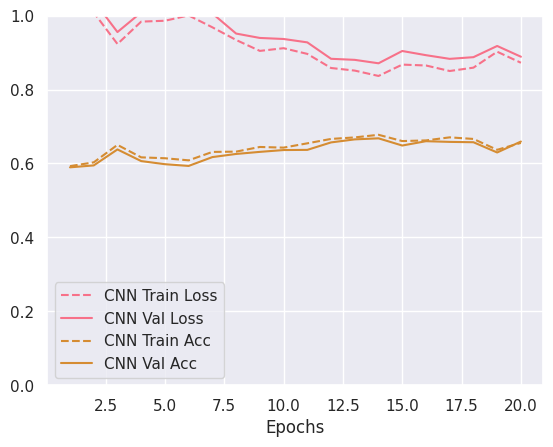

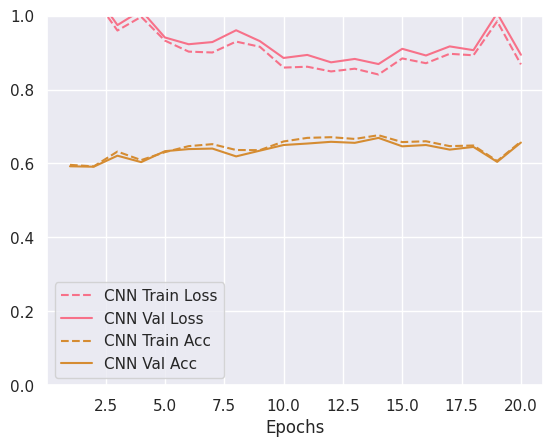

In [2]:
# Run CNN routine for datasets with different sizes
# Goal is to analyse how dataset size affects performance

# The routine below is a dirty trick using the capabilities of k-fold from sklearn
# Takes test set from k-fold and uses it to subsample the raw dataset
# Used it like this because it automates the majority of the work

Xraw, yraw = load_data(path_five_users_main)
# Shuffle data to destroy ordering of users
Xraw, yraw = sklearn.utils.shuffle(Xraw, yraw, random_state=42)

results_dict = {}

for n_splits in range(2, 4):         # Splits of raw dataset
    print("\n\n--- Testing new dataset size ---\n\n")
    kf = sklearn.model_selection.KFold(n_splits)       # No shuffling

    actual_vals, predictions = [], []

    for (_, data_idx) in kf.split(Xraw):
        print("\n-- New splitting of dataset --\n")

        X = Xraw[data_idx]
        y = yraw[data_idx]
         
        actual, preds = run_dataset(X, y)

        actual_vals.extend(actual)
        predictions.extend(preds)

    # TODO: Change to record len of training dataset, not total dataset
    results_dict[str(len(X))] = (actual_vals, predictions)

In [5]:
print("len of raw data: ", len(Xraw))
for key in results_dict:
    print(key, " : ", len(results_dict[key][0]))
    print(sklearn.metrics.classification_report(*results_dict[key]))

len of raw data:  106425
2  :  106425
              precision    recall  f1-score   support

           0       0.67      0.66      0.67     24027
           1       0.79      0.69      0.74     19738
           2       0.73      0.68      0.70     22314
           3       0.62      0.74      0.67     22438
           4       0.58      0.58      0.58     17908

    accuracy                           0.67    106425
   macro avg       0.68      0.67      0.67    106425
weighted avg       0.68      0.67      0.67    106425

3  :  106425
              precision    recall  f1-score   support

           0       0.68      0.67      0.67     24027
           1       0.77      0.70      0.74     19738
           2       0.74      0.66      0.70     22314
           3       0.62      0.73      0.67     22438
           4       0.57      0.59      0.58     17908

    accuracy                           0.67    106425
   macro avg       0.68      0.67      0.67    106425
weighted avg       0.68   